# COMPUTER VISION

In [82]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

In [83]:
# Load model
model = YOLO("yolo11n.pt")


0: 448x640 5 persons, 63.7ms
Speed: 3.1ms preprocess, 63.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


(np.float64(-0.5), np.float64(4999.5), np.float64(3336.5), np.float64(-0.5))

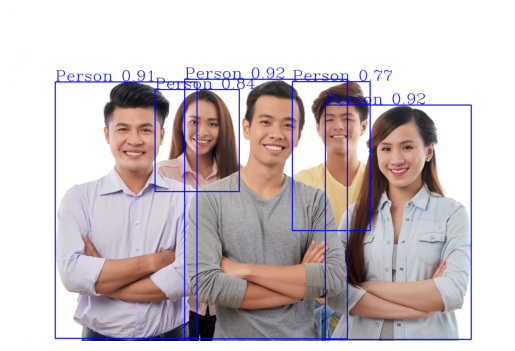

In [89]:
# Build function detect person in picture
def img_detect_person(img_path):
    # Read file image
    img_org = cv2.imread(img_path)

    # Run model person detect
    detect_result = model(img_org)

    # Get list person detected
    detect_obj = detect_result[0]

    # Clone image
    img = img_org.copy()

    # Check person in image + frame + congfig
    for i in range(len(detect_obj.boxes)):
        lable = detect_obj.names[detect_obj.boxes.cls[i].item()]
        if lable == "person":
            # Get location of person
            box = detect_obj.boxes.xyxy[i].cpu().numpy()
            conf = detect_obj.boxes.conf[i].item()

            # Draw frame
            x1, y1, x2, y2 = map(int, box)

            cv2.rectangle(img = img, pt1 = (x1, y1), pt2 = (x2, y2), color = (255, 0, 0), thickness = 10)
            cv2.putText(img = img, text = f"Person {conf:.2f}", org = (x1, y1 - 10), fontFace = cv2.FONT_HERSHEY_COMPLEX, color = (255, 0, 0), thickness = 3, fontScale = 5)

    # Convert to RGB
    detect_obj_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return detect_obj_RGB

img = img_detect_person("test_1.jpg")
plt.imshow(img)
plt.axis("off")